## Image Filters
Earlier we saw how to directly modify pixel values in the image array. But there are more advanced techniques for image manipulations, for example 2D *filters*. Simple filters operate on pixel level, for example a threshold filter (similar to the mask in the previous example) or color separation. Complex filters often operate on individual pixels plus some neighbouring pixels, for example to detect edges or to remove noise.

Therer are various libraries which provide image processing functions, we start with *skimage*

For more information check [https://scikit-image.org/docs/0.18.x/auto_examples/index.html](https://scikit-image.org/docs/0.18.x/auto_examples/index.html)




In [2]:
# First step is to load all required modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcl
import random
import os

from skimage import filters
from skimage.color import rgb2gray, rgba2rgb


## Grayscale conversion, threshold and edge detection
Many filters don't work on color images, so we have to either separate the colors and process the channels individually or create a greyscale image first. This is what we do here. 

We create a histogram of the values, then we apply a threshold and finally an edge detection.

We use a slightly modified display style by creating a figure with 5 elements, instead of individual figures one by one.

**Note: we are loading an PNG image. PNG has FOUR color channels to support transparency.** The format is RGBA, A is for *alpha* channel. 0 is invisible, 1 is opaque.
We need to convert RGBA to RGB before we go to grayscale.


Computed threshold:  0.21156543


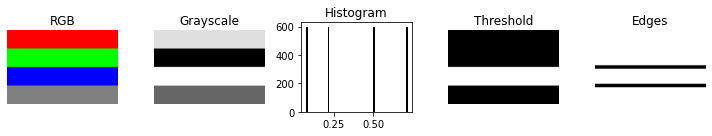

In [3]:
# we save and load the image in the same fashion as before
TARGET_DIR = "data"
# if the directory doesn't exist, we create it
if not TARGET_DIR in os.listdir():
    os.mkdir(TARGET_DIR)
    
file = "color1.png"
a = plt.imread(os.path.sep.join([TARGET_DIR,file]))

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(10,2))
ax[0].imshow(a)
ax[0].set_title('RGB')

b = rgb2gray(rgba2rgb(a))
    
ax[1].imshow(b,cmap="Greys")
ax[1].set_title('Grayscale')

ax[2].hist(b.ravel(), bins=256, histtype='step', color='black')
ax[2].set_title('Histogram')

thr = filters.threshold_otsu(b)
print("Computed threshold: ",thr)
c = b > thr
ax[3].imshow(c,cmap="Greys")
ax[3].set_title('Threshold')

d = filters.sobel(c)
ax[4].imshow(d,cmap="Greys")
ax[4].set_title('Edges')

for i,x in enumerate(ax):
    if i != 2:
        x.axis("off") 
plt.tight_layout()
plt.show()


## Summary
The available libraries allow to apply complex filter operations on entire images.

There are many more image processing operations, check the docs